In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

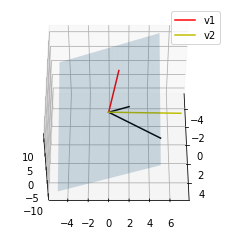

In [19]:
# Column space of a matrix

S = np.vstack(([3, 5, 1], [0, 2, 2])).T

v1 = np.array([[-3, 1, 5]]).T
v2 = np.array([[1, 7, 3]]).T

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')

# Draw planes
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
cp = np.cross(S[:, 0], S[:, 1])
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2]
axes.plot_surface(xx, yy, z1, alpha = 0.2)

axes.plot([0, S[0, 0]], [0, S[1, 0]], [0, S[2, 0]], 'k')
axes.plot([0, S[0, 1]], [0, S[1, 1]], [0, S[2, 1]], 'k')

axes.plot([0, v1[0]], [0, v1[1]], [0, v1[2]], 'r', label = 'v1')
axes.plot([0, v2[0]], [0, v2[1]], [0, v2[2]], 'y', label = 'v2')

axes.legend()
axes.view_init(elev = 50, azim = 0)
plt.show()

In [33]:
# Reduced row echleon form
sp.init_printing()
m = 5
n = 5
A = np.random.randn(m, n)

# Add linear dependency
A[:, 0] = A[:, 1]

sp.pprint(sp.Matrix(A).rref()[0])

⎡1  1.0  0  0  0⎤
⎢               ⎥
⎢0   0   1  0  0⎥
⎢               ⎥
⎢0   0   0  1  0⎥
⎢               ⎥
⎢0   0   0  0  1⎥
⎢               ⎥
⎣0   0   0  0  0⎦


In [34]:
# Determinant of a matrix
sp.pprint(sp.Matrix(A).det())

0


In [46]:
a, b, c, d, e, f, g, h, i = sp.symbols('a b c d e f g h i')
M = sp.Matrix(([a, b, c],[d, e, f], [g, h, i]))
sp.pprint(M.det())

# Identity matrix
I = np.eye(5)
sp.pprint(sp.Matrix(I).det())  # Determinant of identity matrix is always 1

A = np.array([[1, 3], [2, 3]])
print(A), print('')
print(np.linalg.det(A))

a⋅e⋅i - a⋅f⋅h - b⋅d⋅i + b⋅f⋅g + c⋅d⋅h - c⋅e⋅g
1.00000000000000
[[1 3]
 [2 3]]

-2.9999999999999996


In [51]:
# Single row swap flips the sign determinant
A = np.random.randn(5, 5)
print(A), print('')
print(np.linalg.det(A))

B = A[[1, 2, 3, 0, 4], :]
print(B), print('')
print(np.linalg.det(A))  # After 4 swaps

C = A[[0, 1, 3, 2, 4], :]
print(C), print('')
print(np.linalg.det(C))  # After 1 swap

[[-0.6046277  -0.25989656  1.76078637  0.25620213  0.0594544 ]
 [ 0.09094611 -0.74127178 -0.15443335  0.70087255  0.19027203]
 [ 1.27428277 -0.64242973  0.32041239  0.81611712  0.30283944]
 [-0.34567672 -1.26296054  1.07476916  0.07722032 -0.00314946]
 [-0.18569171 -0.05140061  1.37645338  1.08842355  0.21298476]]

0.21630892449208655
[[ 0.09094611 -0.74127178 -0.15443335  0.70087255  0.19027203]
 [ 1.27428277 -0.64242973  0.32041239  0.81611712  0.30283944]
 [-0.34567672 -1.26296054  1.07476916  0.07722032 -0.00314946]
 [-0.6046277  -0.25989656  1.76078637  0.25620213  0.0594544 ]
 [-0.18569171 -0.05140061  1.37645338  1.08842355  0.21298476]]

0.21630892449208655
[[-0.6046277  -0.25989656  1.76078637  0.25620213  0.0594544 ]
 [ 0.09094611 -0.74127178 -0.15443335  0.70087255  0.19027203]
 [-0.34567672 -1.26296054  1.07476916  0.07722032 -0.00314946]
 [ 1.27428277 -0.64242973  0.32041239  0.81611712  0.30283944]
 [-0.18569171 -0.05140061  1.37645338  1.08842355  0.21298476]]

-0.216308

In [58]:
A = sp.Matrix(([a, 2], [2, a]))
d = 0
res = sp.solve(A.det() - d, a)
print(res)

[-2, 2]


In [78]:
# det(A@B) = det(A) * det(B)
A = np.random.randn(5, 5)
B = np.random.randn(5, 5)
detA = np.linalg.det(A)
detB = np.linalg.det(B)
detAB = np.linalg.det(A@B)
print(detA, detB, detAB, detA*detB)

-3.761716627436297 6.1743248996790765 -23.226060638316707 -23.226060638316728


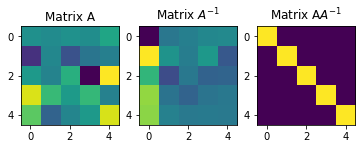

In [84]:
Ainv = np.linalg.inv(A)
I = A@Ainv

plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(I)
plt.title('Matrix A$A^{-1}$')
plt.show()

⎡  0    16.0   10.0   1.0   1.0   0    0    0 ⎤
⎢                                             ⎥
⎢-11.0  -12.0  -9.0  -17.0   0   1.0   0    0 ⎥
⎢                                             ⎥
⎢-28.0   5.0   1.0   12.0    0    0   1.0   0 ⎥
⎢                                             ⎥
⎣-1.0    6.0   -3.0  -15.0   0    0    0   1.0⎦

(4, 8)

⎡1  0  0  0  -0.021142162818955   -0.0309842041312272  -0.0240583232077764  0.
⎢                                                                             
⎢0  1  0  0  -0.0383961117861482  -0.0735115431348724   0.025273390036452    0
⎢                                                                             
⎢0  0  1  0   0.166151709772609    0.122808540183996   -0.0424579066134352  -0
⎢                                                                             
⎣0  0  0  1  -0.0471793091477174  -0.0519007116819997  0.0202048255511196   0.

0144592952612394 ⎤
                 ⎥
.10097205346294  ⎥
                 ⎥
.162072556847769 ⎥
      

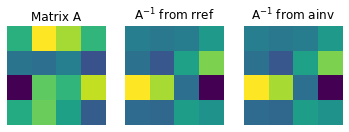

In [107]:
# Matrix inverse by row reduction

m = 4

A = sp.Matrix(np.round(10*np.random.randn(m, m)), dtype = 'float')

Aaug = sp.Matrix(np.concatenate((A, np.eye(m)), axis = 1))
sp.pprint(Aaug), print('')
print(Aaug.shape), print('')

# rref
Asol = Aaug.rref()
sp.pprint(Asol[0])
Ainvrref = Asol[0][:, m:]
Ainv = A.inv()
sp.pprint(Ainvrref)
sp.pprint(Ainv)

#plot
plt.subplot(131)
plt.imshow(sp.matrix2numpy(A, dtype = 'float'))
plt.title('Matrix A')
plt.axis('off')

plt.subplot(132)
plt.imshow(sp.matrix2numpy(Ainvrref, dtype = 'float'))
plt.title('A$^{-1}$ from rref')
plt.axis('off')

plt.subplot(133)
plt.imshow(sp.matrix2numpy(Ainv, dtype = 'float'))
plt.title('A$^{-1}$ from ainv')
plt.axis('off')

plt.show()

In [114]:
# Inverse of a diagonal matrix

A = np.diag(np.arange(1, 6))
print(np.linalg.inv(A))  # Element values are reciprocals of the element vlaues


[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.        ]
 [-0.         -0.         -0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


Shape of A^TA: (3, 3)
Shape of AA^T: (6, 6)
Rank of A^TA: 3
Rank of AA^T: 3
[[ 1.00000000e+00  3.33066907e-16 -8.32667268e-17]
 [ 6.93889390e-17  1.00000000e+00  5.55111512e-17]
 [-2.77555756e-17 -1.31838984e-16  1.00000000e+00]]

[[ -0.16601562  -2.5          3.875       -2.15625     -1.90625
    0.6796875 ]
 [  0.2734375  -10.625       -3.375        1.5          1.
    0.1640625 ]
 [ -0.91015625  16.375        1.875       -2.15625     -1.484375
    2.5546875 ]
 [  0.265625     3.125        3.375       -0.5625      -0.34375
   -2.0390625 ]
 [ -0.34179688  11.25        -0.125       -0.1875       0.109375
    0.4921875 ]
 [ -0.61914062 -10.375       -7.75         1.09375      0.53125
    5.078125  ]]

[[ 1.00000000e+00  3.44207085e-16 -9.78221410e-17]
 [ 3.85704923e-17  1.00000000e+00  3.14147579e-17]
 [-1.66967135e-17 -1.84097529e-16  1.00000000e+00]]

[[ 20.    -12.     14.      7.5    -0.875 -14.   ]
 [ 24.    -16.     24.     24.     -1.5   -46.   ]
 [ -8.      4.      0.     -3.   

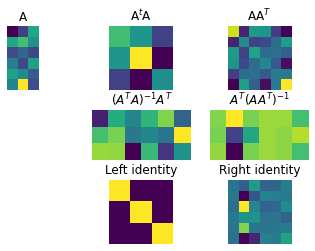

In [132]:
# Left inverse and right inverse
# m>n, for left inverse
# n>m, for right inverse
m = 6
n = 3

A = np.round(30*np.random.randn(m, n))
AtA = A.T@A
AAt = A@A.T

print('Shape of A^TA: {}'.format(np.shape(AtA)))
print('Shape of AA^T: {}'.format(np.shape(AAt)))
print('Rank of A^TA: {}'.format(np.linalg.matrix_rank(AtA)))
print('Rank of AA^T: {}'.format(np.linalg.matrix_rank(AAt)))

#left inverse
Aleft = np.linalg.inv(AtA)@A.T

#right inverse
Aright = A.T@np.linalg.inv(AAt)

# Left identity matrix
I_left = Aleft @ A
print(I_left), print('')

# Right identity matrix
I_right = A @ Aright
print(I_right), print('')


#using the inverse function
Ata_inv = np.linalg.inv(AtA)
I_AtA = Ata_inv @ AtA

Aat_inv = np.linalg.inv(AAt)
I_AAt = Aat_inv @ AAt

print(I_AtA), print('')
print(I_AAt), print('')


#plot

plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^t$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('Left identity')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('Right identity')

plt.show()

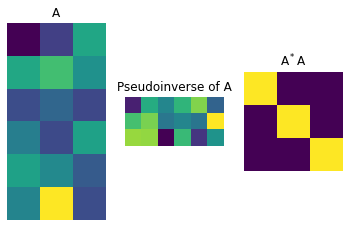

In [134]:
# Pseudo inverse

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

In [ ]:
# Code challenge - is pseudo inverse same for an invertible matrix

m = 5
A = np.random.randn(5, 5)

Ainv = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)

